In [1]:
import pandas as pd

# read the input csv file into a pandas dataframe
df = pd.read_csv('loss-circulation.csv',encoding= 'unicode_escape')

In [2]:
df

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ..."
...,...,...,...
6301,NaN,NaN,NaN
6302,NaN,NaN,NaN
6303,NaN,NaN,NaN
6304,NaN,NaN,NaN


In [3]:
df.columns

Index(['DM_EVENT.date_ops_start', 'DM_ACTIVITY.activity_code',
       'DM_ACTIVITY.activity_memo'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6306 entries, 0 to 6305
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DM_EVENT.date_ops_start    1499 non-null   object
 1   DM_ACTIVITY.activity_code  1499 non-null   object
 2   DM_ACTIVITY.activity_memo  1499 non-null   object
dtypes: object(3)
memory usage: 147.9+ KB


In [5]:
# Delete rows with missing values
df = df.dropna()

In [6]:
df

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ..."
...,...,...,...
1494,31/07/2014,P4F,M/U circulating swedge and surface line. Confi...
1495,31/07/2014,P4F,"Continue RIH 2-7/8"" completion with 2-7/8"" 6.4..."
1496,31/07/2014,P4F,"Continue RIH with 2-7/8"" completion 6.4# L80 C..."
1497,31/07/2014,F1,"Drill 6-1/8"" hole (AGS/MWD/GrRes-NeuDens) from..."


In [7]:
import re
# Define the regular expression pattern
pattern = r'(?i)loss\s([\d.]+)\s(m3|bbl|bbls)'
# (?i)loss matches loss case-insensitive in the memo.
# \s matches whitespace characters.
# ([\d.]+) matches one or more digits inside a capturing group.
# \s matches whitespace characters.
# (m3|bbl|bbls) matches one of the three possible units ("m3", "bbl", or "bbls") inside a capturing group.

# Extract the values and units using the pattern
values = []
for memo in df['DM_ACTIVITY.activity_memo']:
    match = re.search(pattern, memo)
    if match:
        value, unit = match.groups()
        if unit == 'm3':
            value = float(value)
        else:
            value = float(value) * 0.159 # convert bbls to m3
        values.append(value)
    else:
        values.append(0.0)

In [8]:
# Add the extracted values as a new column
df2 = df.copy()
df2.loc[:, 'LOSS_CIRCULATION(m3)'] = values

In [9]:
df2

,DM_EVENT.date_ops_start,DM_ACTIVITY.activity_code,DM_ACTIVITY.activity_memo,LOSS_CIRCULATION(m3)
0,09/01/2014,C2,Drop top plug. Cmt unit displace with 20 bbls ...,0.0
1,09/01/2014,C2,Drop bottom plug. Mix and pump 28 m3 of 1.90 S...,6.2
2,09/01/2014,C2,Drop top plug. Cement unit displace cement wit...,0.0
3,09/01/2014,C2,Rig pump 1.59 m3 of base oil ahead and 1.78 SG...,5.0
4,09/01/2014,F1,"Cont drilling 6-1/8"" hole from 3121 m to 3130 ...",0.0
...,...,...,...,...
1494,31/07/2014,P4F,M/U circulating swedge and surface line. Confi...,0.0
1495,31/07/2014,P4F,"Continue RIH 2-7/8"" completion with 2-7/8"" 6.4...",0.0
1496,31/07/2014,P4F,"Continue RIH with 2-7/8"" completion 6.4# L80 C...",0.0
1497,31/07/2014,F1,"Drill 6-1/8"" hole (AGS/MWD/GrRes-NeuDens) from...",0.0


In [10]:
# Save the transformed dataset to a new csv file
df2.to_csv('loss-circulation-transformed.csv', index=False)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate basic statistics of the loss circulation values
lc_stats = df2['LOSS_CIRCULATION(m3)'].describe()

# Calculate the percentage of missing values
lc_missing = df2['LOSS_CIRCULATION(m3)'].isna().mean() * 100

# Print the basic statistics and percentage of missing values
print("Basic Statistics of Loss Circulation:")
print(lc_stats.to_string())
print("\nPercentage of Missing Values in Loss Circulation: {:.2f}%".format(lc_missing))

Basic Statistics of Loss Circulation:
count    1499.000000
mean        1.342251
std         6.429881
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       104.622000

Percentage of Missing Values in Loss Circulation: 0.00%


In [12]:
np.count_nonzero(df2['LOSS_CIRCULATION(m3)'])

218

In [13]:
np.count_nonzero(df2['LOSS_CIRCULATION(m3)'] == 0)

1281

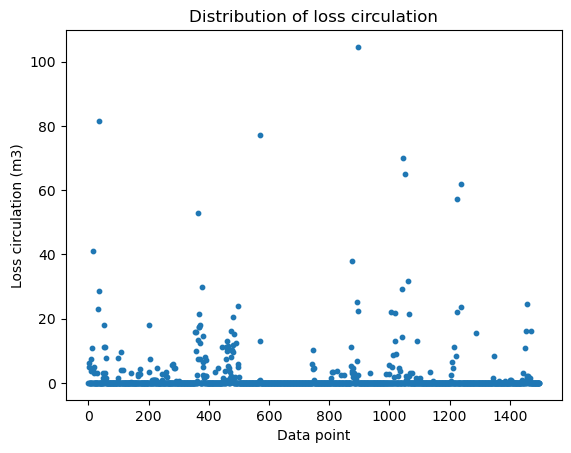

In [14]:
# Create a scatter plot of the loss circulation values
fig, ax = plt.subplots()
ax.scatter(range(len(df2['LOSS_CIRCULATION(m3)'])), df2['LOSS_CIRCULATION(m3)'], s=10)
ax.set_xlabel("Data point")
ax.set_ylabel("Loss circulation (m3)")
ax.set_title("Distribution of loss circulation")
plt.show()

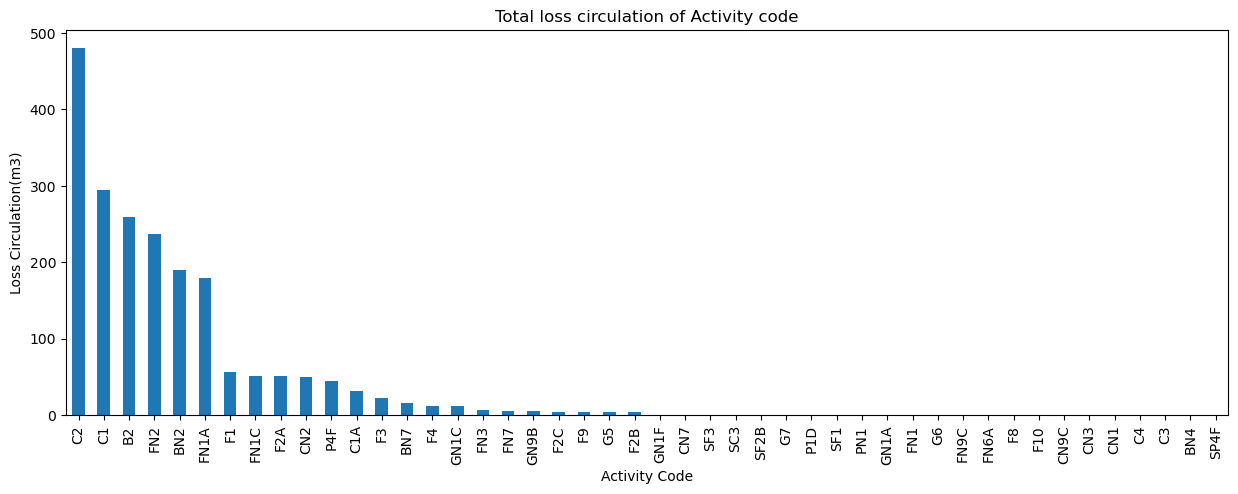

In [15]:
# Plot the graph
fig, ax = plt.subplots(figsize=(15,5))
df2.groupby("DM_ACTIVITY.activity_code")["LOSS_CIRCULATION(m3)"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax)
ax.set_xlabel("Activity Code")
ax.set_ylabel("Loss Circulation(m3)")
ax.set_title("Total loss circulation of Activity code")

plt.show()

In [16]:
# Find the top 3 activity codes from which loss circulation occurs the most
lc_by_activity = df2.groupby('DM_ACTIVITY.activity_code')['LOSS_CIRCULATION(m3)'].sum().sort_values(ascending=False)
top3_activities = lc_by_activity.head(3)
print("\nTop 3 Activity Codes with the Most Loss Circulation:")
print(top3_activities.to_string())


Top 3 Activity Codes with the Most Loss Circulation:
DM_ACTIVITY.activity_code
C2    479.763
C1    294.958
B2    258.534
